In [13]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import material as ml
import numpy as np
import pandas as pd
from material import sellmeier_fitting as sf
from os import path

In [17]:
tree = ET.parse('.\material\OC_k.xml')
root = tree.getroot()

wl = []
n = []

for i in root.iter('point'):
    wl.append(float(i.attrib['dx']))
    n.append(float(i.attrib['dy']))
wn = np.array(wl)
nn = np.array(n)
print(wn, nn)

[295.69498867 299.86046276 301.99936678 305.82690189 309.76689758
 313.59433138 317.19646408 320.57347298 324.17552969 328.00268487
 331.37956713 335.09405909 340.38441762 344.88666557 350.85211687
 355.91704766 359.63136232 366.27188106 371.67437089 379.44030597
 385.96808551 391.70805841 396.99773306 403.75050975 410.27811198
 417.59352085 425.69676169 433.34970428 445.61687415 454.95783995
 465.31160953 476.67823356 493.33417763 508.75211813 519.66844392
 533.73581895 550.5040463  570.6484467  588.76703689 607.67340839
 628.94304783 654.48902623 680.14749053 693.98953914 717.39732273
 736.41610415 758.4733476  770.51481111 790.88403136 825.09514824] [0.02650073 0.02499999 0.02434343 0.02314755 0.02202203 0.02091996
 0.02002895 0.01918483 0.01836417 0.01752007 0.01679321 0.01606637
 0.01501127 0.01428447 0.01334666 0.01261988 0.0120572  0.01126014
 0.01058028 0.00973637 0.00912692 0.00856434 0.00814245 0.00760336
 0.00715808 0.00666593 0.00610346 0.00568168 0.00504904 0.00465079
 0.0

In [18]:
ml.save_material(wn, 'OC', '_wk')

In [47]:
res = sf(wn, nn)
print(res)

requested number of basinhopping iterations completed successfully
[ 0.62598679 -0.03534273 -0.36519534  1.38439905  0.00786237  0.11344442
 -0.0406279 ]


In [43]:
ml.save_material(res, "", '_SE')

In [24]:
test = ml.open_material('Acrylic', 'Sellmeier')

[0.02549139 0.02450654 0.02316994 0.02206785 0.02089542 0.01976991
 0.01913681 0.01840994 0.01747203 0.01648725 0.01561972 0.01458807
 0.0137909  0.01313443 0.01226696 0.01146985 0.01074311 0.00999292
 0.00924277 0.00839889 0.00760196 0.00673477 0.00589109 0.00525841
 0.00483669 0.00418069 0.0037592  0.00315037 0.00279919 0.00244828
 0.0020505  0.00174653 0.00151304 0.00132615 0.00113995 0.0009066
 0.000767   0.00069751 0.00055776 0.00053494 0.00048895 0.00041959
 0.00039693 0.00035102 0.00032841 0.00028262        nan        nan
        nan        nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


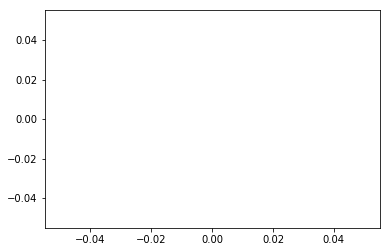

In [34]:
x = np.linspace(400, 700)
k = test.k
wk = test.wl_k
print(k)
#plt.plot(wk, k)
kk = test.kvalues(x)
plt.plot(x, kk)
print(kk)
plt.show()

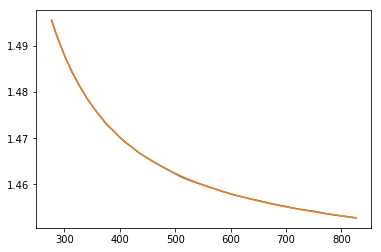

In [45]:
plt.plot(wn, nn)
plt.plot(wn, test.nvalues(wn))
plt.show()